In [1]:
import pandas as pd
import numpy as np

import pickle

from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

from matplotlib import pyplot as plt
from adjustText import adjust_text
import math
from tqdm import tqdm
import seaborn as sns

## Helper Functions

In [2]:
def split_text(text, n=10):
    """
        Splits text into n partitions
    """
    
    # Get partition ranges
    length = len(text)
    partition_size = math.floor(length/n)
    partition = np.arange(0, length, partition_size)
    
    # split text
    text_partition = []
    for split in range(n):
        text_partition.append(text[partition[split]:partition[split]+partition_size])
    return text_partition

In [3]:
def build_presidents_polarity_transcripts(corpus, n=10):
    """
        Returns the polarity of the corpus for each president's text
    """
    
    polarity_transcripts = {}
    for president in corpus.index:
        transcript = corpus.loc[president].transcripts
        partitioned_text = split_text(transcript, n)
        polarity_text = list(map(pol, partitioned_text))
        polarity_transcripts[president] = polarity_text
    return polarity_transcripts

In [4]:
def build_presidents_subjectivity_transcripts(corpus, n=10):
    """
        Returns the subjectivity of the corpus for each president's text
    """
    
    polarity_transcripts = {}
    for president in corpus.index:
        transcript = corpus.loc[president].transcripts
        partitioned_text = split_text(transcript, n)
        polarity_text = list(map(sub, partitioned_text))
        polarity_transcripts[president] = polarity_text
    return polarity_transcripts

In [5]:
def build_party_polarity_transcripts(corpus, n=10):
    """
        Returns the polarity of the corpus for each party's text
    """
    
    polarity_transcripts = {}
    for party in corpus.index:
        transcript = corpus.loc[party].transcripts
        partitioned_text = split_text(transcript, n)
        polarity_text = list(map(pol, partitioned_text))
        polarity_transcripts[party] = polarity_text
    return polarity_transcripts

In [6]:
def build_party_subjectivity_transcripts(corpus, n=10):
    """
        Returns the subjectivity of the corpus for each party's text
    """
    
    polarity_transcripts = {}
    for party in corpus.index:
        transcript = corpus.loc[party].transcripts
        partitioned_text = split_text(transcript, n)
        polarity_text = list(map(sub, partitioned_text))
        polarity_transcripts[party] = polarity_text
    return polarity_transcripts

In [7]:
def build_party_corpus(corpus):
    """
        Returns the corpus of the political parties and their respective transcripts
    """
    
    # Build corpus
    party_texts = []
    parties = list(set(corpus.Party.values))
    for party in parties:
        text = ""
        for row in corpus[corpus.Party == party].itertuples(index=False):
            text += row[1]
        party_texts.append(text)
    party_corpus =  pd.DataFrame({'Party': parties, 'transcripts': party_texts}).set_index('Party')
    
    # Include only non-null parties
    party_order = []
    parties = ['Democratic', 'Republican', 'Democratic-Republican', 'Whig', 'Federalist', 'Unaffiliated']
    for party in parties:
        if party in set(corpus.Party.values):
            party_order.append(party)
    party_corpus = party_corpus.reindex(index = party_order)
    return party_corpus

In [8]:
def graph_political_era_polarity(corpus, title, N=10):
    
    # Build party corpus
    party_corpus = build_party_corpus(corpus)
    
    # Number of partitions
    N = 10
    polarity_transcripts = build_party_polarity_transcripts(party_corpus, N)
    
    # Get number of rows necessary and if last subplot needs to be removed
    delete_last = False
    row_count = len(polarity_transcripts)
    if row_count % 2 == 1:
        delete_last = True
    while row_count % 2 != 0:
        row_count += 1
    row_count //= 2
        
    # Plot
    fig, ax = plt.subplots(row_count, 2, figsize=(12,2.5 + (2.5 * row_count)))
    fig.suptitle(title, fontsize=16)
    
    if row_count == 1:
        for i, party in enumerate(party_corpus.index):
            
            # Label for partition size
            length = len(party_corpus.loc[party].transcripts)
            partition_size = math.floor(length/N)
            x_label = 'Partitions ({} characters per partition)'.format(partition_size)

            # Plot subplot
            sns.lineplot(x=range(0, N), y=polarity_transcripts[party], ax=ax[i], color=parties_color[party])
            ax[i].set(xlabel=x_label, ylabel='<-- Negative ----------- Positive -->')
            ax[i].set_title(party)        
    else:
        i = -1
        for k, party in enumerate(party_corpus.index):
            if k % 2 == 0:
                i += 1
            j = k % 2
            
            # Label for partition size
            length = len(party_corpus.loc[party].transcripts)
            partition_size = math.floor(length/N)
            x_label = 'Partitions ({} characters per partition)'.format(partition_size)
            
            # Plot subplot
            sns.lineplot(x=range(0, N), y=polarity_transcripts[party], ax=ax[i, j], color=parties_color[party])
            ax[i, j].set(xlabel=x_label, ylabel='<-- Negative ----------- Positive -->')
            ax[i, j].set_title(party)

    # Delete unused subplot
    if delete_last:
        fig.delaxes(ax[row_count - 1, 1])
            
    fig.tight_layout(pad=3)
    fig.subplots_adjust(top=0.88)

In [9]:
def graph_political_era_subjectivity(corpus, title, N = 10):
    
    # Build party corpus
    party_corpus = build_party_corpus(corpus)
    
    # Number of partitions
    N = 10
    subjectivity_transcripts = build_party_subjectivity_transcripts(party_corpus, N)
    

    # Get number of rows necessary and if last subplot needs to be removed
    delete_last = False
    row_count = len(subjectivity_transcripts)
    if row_count % 2 == 1:
        delete_last = True
    while row_count % 2 != 0:
        row_count += 1
    row_count //= 2
        
    # Plot
    fig, ax = plt.subplots(row_count, 2, figsize=(12,2.5 + (2.5 * row_count)))
    fig.suptitle(title, fontsize=16)
    
    if row_count == 1:
        for i, party in enumerate(party_corpus.index):
            
            # Label for partition size
            length = len(party_corpus.loc[party].transcripts)
            partition_size = math.floor(length/N)
            x_label = 'Partitions ({} characters per partition)'.format(partition_size)

            # Plot subplot
            sns.lineplot(x=range(0, N), y=subjectivity_transcripts[party], ax=ax[i], color=parties_color[party])
            ax[i].set(xlabel=x_label, ylabel='<-- Facts ----------- Opinions -->')
            ax[i].set_title(party)   
    else:
        i = -1
        for k, party in enumerate(party_corpus.index):
            if k % 2 == 0:
                i += 1
            j = k % 2
            
            # Label for partition size
            length = len(party_corpus.loc[party].transcripts)
            partition_size = math.floor(length/N)
            x_label = 'Partitions (Size: {} characters per partition)'.format(partition_size)
            
            # Plot subplot
            sns.lineplot(x=range(0, N), y=subjectivity_transcripts[party], ax=ax[i, j], color=parties_color[party])
            ax[i, j].set(xlabel=x_label, ylabel='<-- Facts ----------- Opinions -->')
            ax[i, j].set_title(party)

    # Delete unused subplot
    if delete_last:
        fig.delaxes(ax[row_count - 1, 1])
            
    # Add padding between subplots and title
    fig.tight_layout(pad=3)
    fig.subplots_adjust(top=0.88)

In [10]:
def graph_political_era_comparison(corpus, title, N = 10):
    
    # Build party corpus
    party_corpus = build_party_corpus(corpus)
    
    # Number of partitions
    N = 10
    polarity_transcripts = build_party_polarity_transcripts(party_corpus, N)
    subjectivity_transcripts = build_party_subjectivity_transcripts(party_corpus, N)
    
    # Number of parties
    party_count = len(party_corpus)
        
    # Plot
    fig, ax = plt.subplots(party_count + 1, 2, figsize=(12, 10 + (2.5 * party_count)))
    fig.suptitle(title, fontsize=16)
    
    # Individual Plots
    for i, party in enumerate(party_corpus.index):
        # Label for partition size
        length = len(party_corpus.loc[party].transcripts)
        partition_size = math.floor(length/N)
        x_label = 'Partitions ({} characters per partition)'.format(partition_size)
        
        # Plot polarity subplot
        sns.lineplot(x=range(0, N), y=polarity_transcripts[party], ax=ax[i, 0], color=parties_color[party])
        ax[i, 0].set(xlabel=x_label, ylabel='<-- Negative ------ Positive -->')
        ax[i, 0].set_title(party + " (polarity)")  
        
        # Plot subjectivity subplot
        sns.lineplot(x=range(0, N), y=subjectivity_transcripts[party], ax=ax[i, 1], color=parties_color[party])
        ax[i, 1].set(xlabel=x_label, ylabel='<-- Facts ------ Opinions -->')
        ax[i, 1].set_title(party + " (subjectivity)") 
        
    # Comparison Plots
    for i, party in enumerate(party_corpus.index):
        # Label for partition size
        length = len(party_corpus.loc[party].transcripts)
        partition_size = math.floor(length/N)
        x_label = 'Partitions ({} characters per partition)'.format(partition_size)
        
        # Plot polarity subplot
        sns.lineplot(x=range(0, N), y=polarity_transcripts[party], ax=ax[party_count, 0], color=parties_color[party], label=party)
        ax[party_count, 0].set(xlabel=x_label, ylabel='<-- Negative ------ Positive -->')
        ax[party_count, 0].set_title("Polarity Comparison")  
        
        # Plot subjectivity subplot
        sns.lineplot(x=range(0, N), y=subjectivity_transcripts[party], ax=ax[party_count, 1], color=parties_color[party], label=party)
        ax[party_count, 1].set(xlabel=x_label, ylabel='<-- Facts ------ Opinions -->')
        ax[party_count, 1].set_title("Subjectivity Comparison") 
            
    # Add padding between subplots and title
    fig.tight_layout(pad=3)
    fig.subplots_adjust(top=0.88)

## Load Data

In [11]:
# conda install -c conda-forge adjusttext 

# Load corpuses
corpus = pickle.load(open("pickles/corpus.p", "rb" ))
first_party_corpus = pickle.load(open("pickles/first_party_corpus.p", "rb" ))
second_party_corpus = pickle.load(open("pickles/second_party_corpus.p", "rb" ))
third_party_corpus = pickle.load(open("pickles/third_party_corpus.p", "rb" ))
fourth_party_corpus = pickle.load(open("pickles/fourth_party_corpus.p", "rb" ))
fifth_party_corpus = pickle.load(open("pickles/fifth_party_corpus.p", "rb" ))
sixth_party_corpus = pickle.load(open("pickles/sixth_party_corpus.p", "rb" ))

## Polarity of Subjectivity of Presidents

In [12]:
# Find polarity and subjectivity of texts for each president
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

corpus['pol'] = corpus.transcripts.apply(pol)
corpus['subj'] = corpus.transcripts.apply(sub)

corpus

,Party,transcripts,pol,subj
George Washington,Unaffiliated,Fellow Citizens of the Senate and the House of...,0.140913,0.455947
John Adams,Federalist,"When it was first perceived, in early times, t...",0.136905,0.459437
Thomas Jefferson,Democratic-Republican,"FRIENDS AND FELLOW-CITIZENS, Called upon to un...",0.136088,0.445346
James Madison,Democratic-Republican,Unwilling to depart from examples of the most ...,0.124971,0.409813
James Monroe,Democratic-Republican,I should be destitute of feeling if I was not ...,0.155569,0.438603
John Quincy Adams,Democratic-Republican,"AND NOW, FRIENDS AND COUNTRYMEN, if the wise a...",0.114201,0.397722
Andrew Jackson,Democratic,Fellow Citizens: About to undertake the arduou...,0.108693,0.446926
Martin Van Buren,Democratic,Fellow Citizens: The practice of all my predec...,0.114611,0.447130
William Harrison,Whig,Called from a retirement which I had supposed ...,0.151383,0.487550
John Tyler,Unaffiliated,To the People of the United States Before my a...,0.122042,0.450268


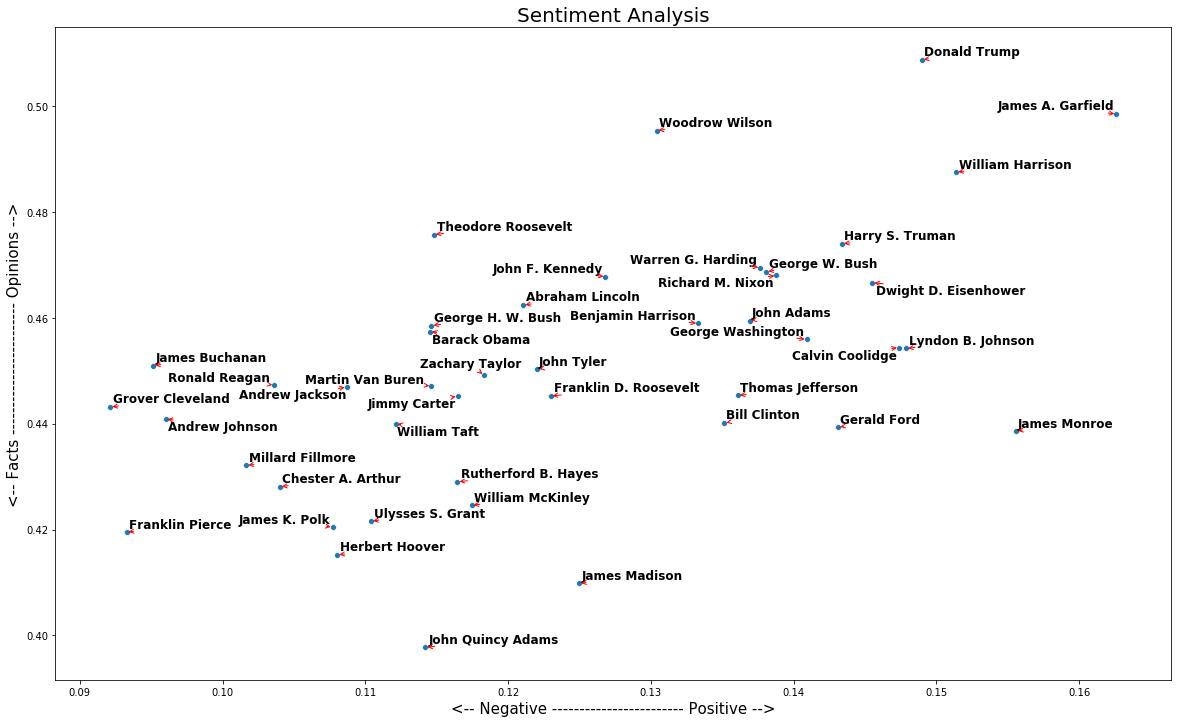

In [13]:
# Plot
fig, ax = plt.subplots(figsize=(20,12))
sns.scatterplot(x=corpus.pol.values, y=corpus.subj.values)

texts = [ax.text(corpus.pol.values[line], corpus.subj.values[line], corpus.index[line], horizontalalignment='center', size='large', color='black', weight='semibold') for line in range(0,corpus.shape[0])]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ------------------------ Positive -->', fontsize=15)
plt.ylabel('<-- Facts ------------------------ Opinions -->', fontsize=15)

plt.show()

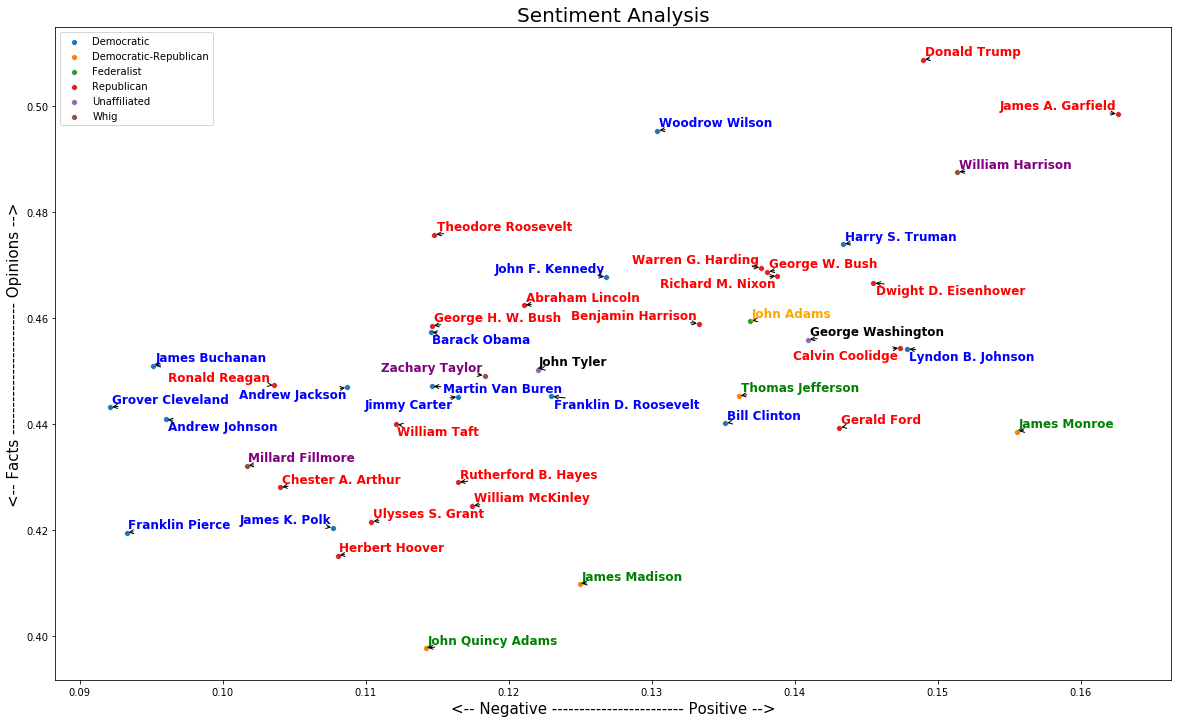

In [14]:
# Party coloring
parties_color = {
            'Democratic': 'blue',
            'Democratic-Republican': 'green',
            'Federalist': 'orange',
            'Republican': 'red',
            'Unaffiliated': 'black',
            'Whig': 'purple'
          }

# Plot speeches per year
fig, ax = plt.subplots(figsize=(20,12))

texts = []

# Democratic
party_corpus = corpus[corpus['Party'] == 'Democratic']
sns.scatterplot(x=party_corpus.pol.values, y=party_corpus.subj.values, label='Democratic')
texts += [ax.text(party_corpus.pol.values[line], party_corpus.subj.values[line], party_corpus.index[line], horizontalalignment='center', size='large', color=parties_color['Democratic'], weight='semibold') for line in range(0,party_corpus.shape[0])]
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='blue'))

# Democratic-Republican
party_corpus = corpus[corpus['Party'] == 'Democratic-Republican']
sns.scatterplot(x=party_corpus.pol.values, y=party_corpus.subj.values, label='Democratic-Republican')
texts += [ax.text(party_corpus.pol.values[line], party_corpus.subj.values[line], party_corpus.index[line], horizontalalignment='center', size='large', color=parties_color['Democratic-Republican'], weight='semibold') for line in range(0,party_corpus.shape[0])]
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green'))

# Federalist
party_corpus = corpus[corpus['Party'] == 'Federalist']
sns.scatterplot(x=party_corpus.pol.values, y=party_corpus.subj.values, label='Federalist')
texts += [ax.text(party_corpus.pol.values[line], party_corpus.subj.values[line], party_corpus.index[line], horizontalalignment='center', size='large', color=parties_color['Federalist'], weight='semibold') for line in range(0,party_corpus.shape[0])]
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='orange'))

# Republican
party_corpus = corpus[corpus['Party'] == 'Republican']
sns.scatterplot(x=party_corpus.pol.values, y=party_corpus.subj.values, label='Republican')
texts += [ax.text(party_corpus.pol.values[line], party_corpus.subj.values[line], party_corpus.index[line], horizontalalignment='center', size='large', color=parties_color['Republican'], weight='semibold') for line in range(0,party_corpus.shape[0])]
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Unaffiliated
party_corpus = corpus[corpus['Party'] == 'Unaffiliated']
sns.scatterplot(x=party_corpus.pol.values, y=party_corpus.subj.values, label='Unaffiliated')
texts += [ax.text(party_corpus.pol.values[line], party_corpus.subj.values[line], party_corpus.index[line], horizontalalignment='center', size='large', color=parties_color['Unaffiliated'], weight='semibold') for line in range(0,party_corpus.shape[0])]
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

# Whig
party_corpus = corpus[corpus['Party'] == 'Whig']
sns.scatterplot(x=party_corpus.pol.values, y=party_corpus.subj.values, label='Whig')
texts += [ax.text(party_corpus.pol.values[line], party_corpus.subj.values[line], party_corpus.index[line], horizontalalignment='center', size='large', color=parties_color['Whig'], weight='semibold') for line in range(0,party_corpus.shape[0])]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ------------------------ Positive -->', fontsize=15)
plt.ylabel('<-- Facts ------------------------ Opinions -->', fontsize=15)

plt.show()

## Polarity of Presidents Over Time

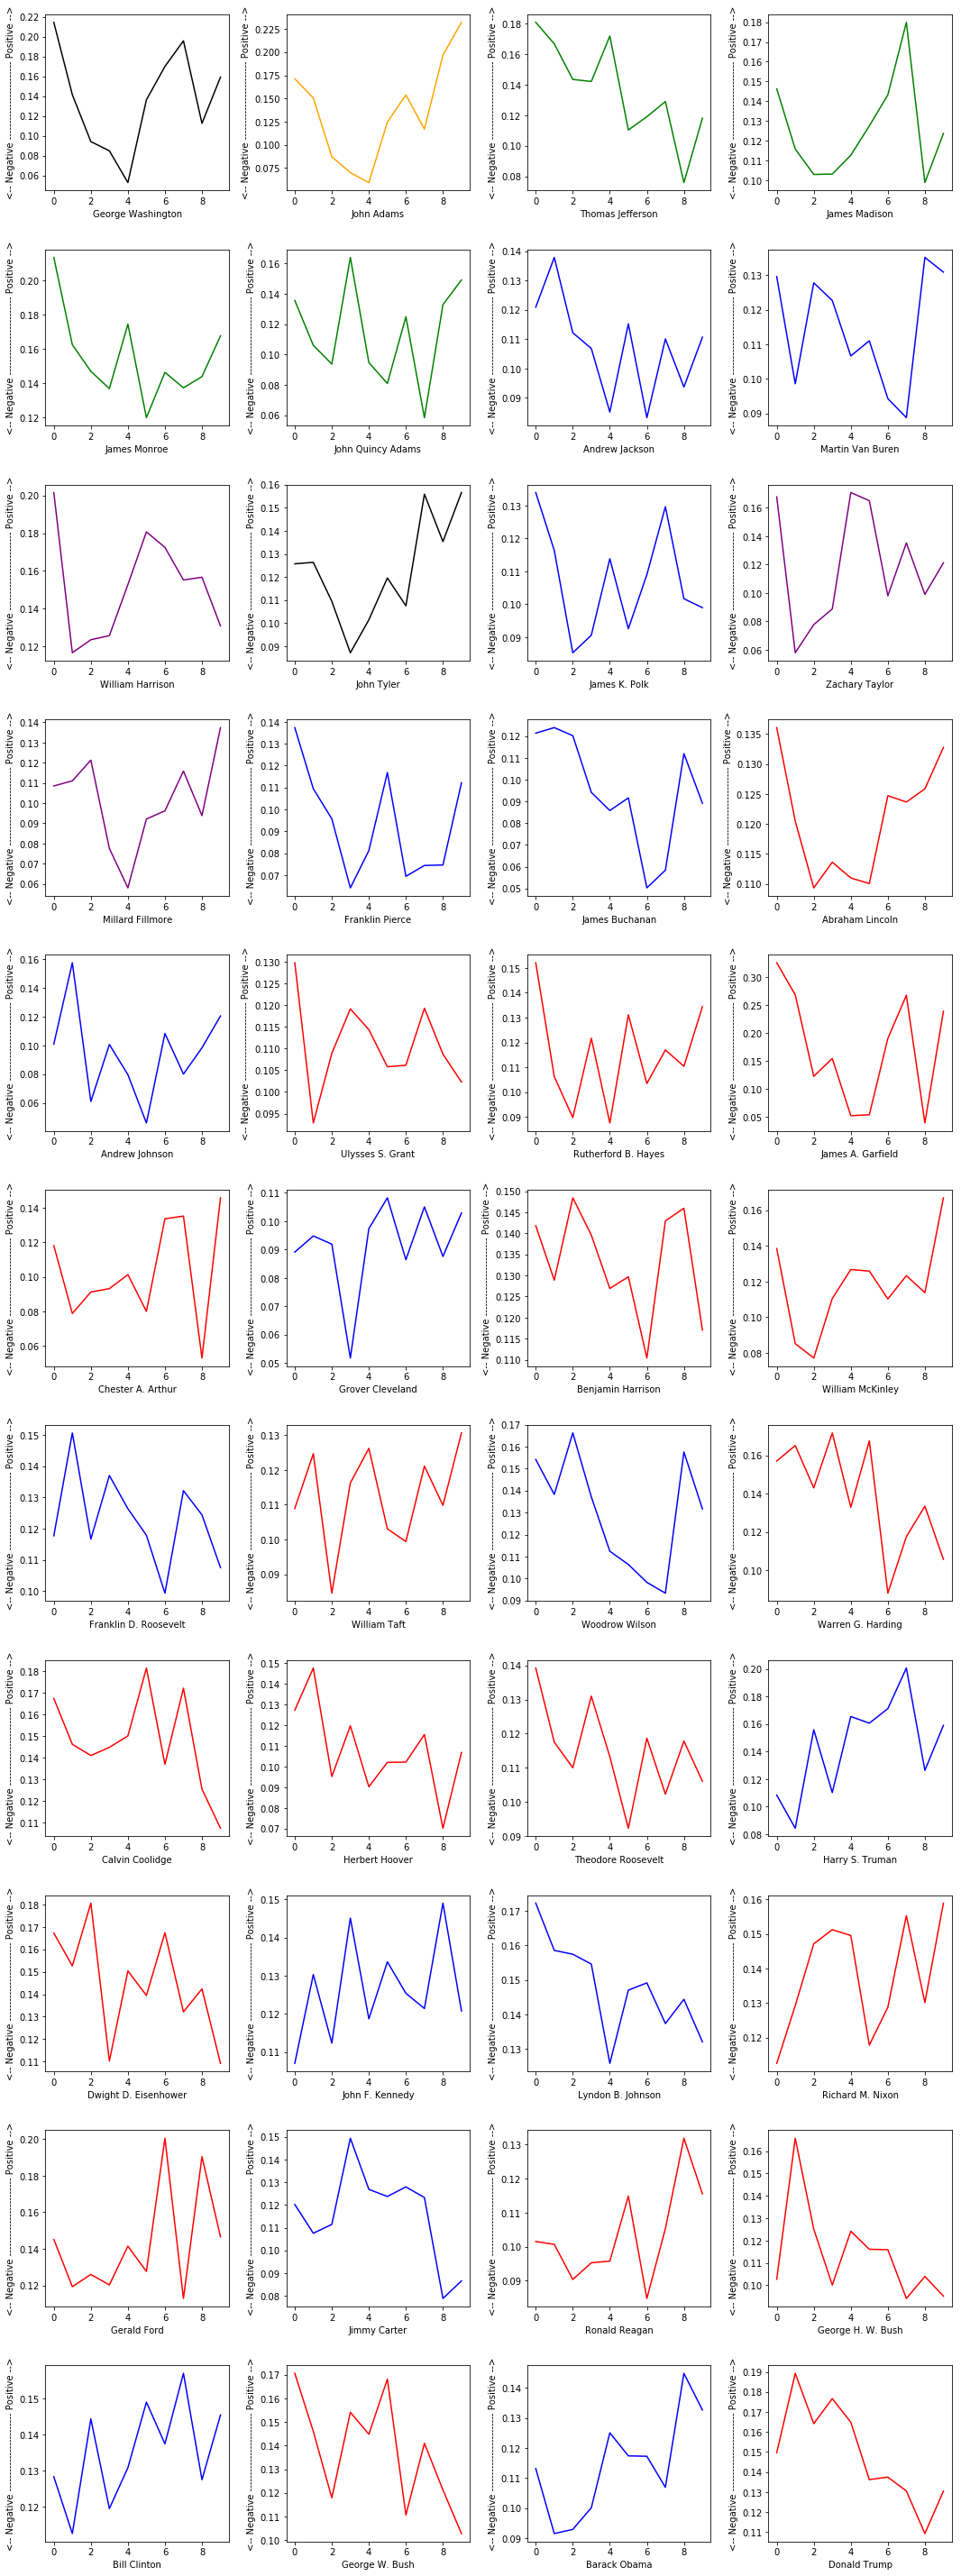

In [15]:
# Number of partitions
N = 10
polarity_transcripts = build_presidents_polarity_transcripts(corpus, N)

# Plots
fig, ax = plt.subplots(11, 4, figsize=(15,40))

i = -1
for k, president in enumerate(corpus.index):
    if k % 4 == 0:
        i += 1
    j = k % 4
    sns.lineplot(x=range(0, N), y=polarity_transcripts[president], ax=ax[i, j], color=parties_color[corpus.loc[president].Party])
    ax[i, j].set(xlabel=president, ylabel='<-- Negative ------------------------ Positive -->')

fig.tight_layout()

## Polarity and Subjectivity of Political Parties Over Time

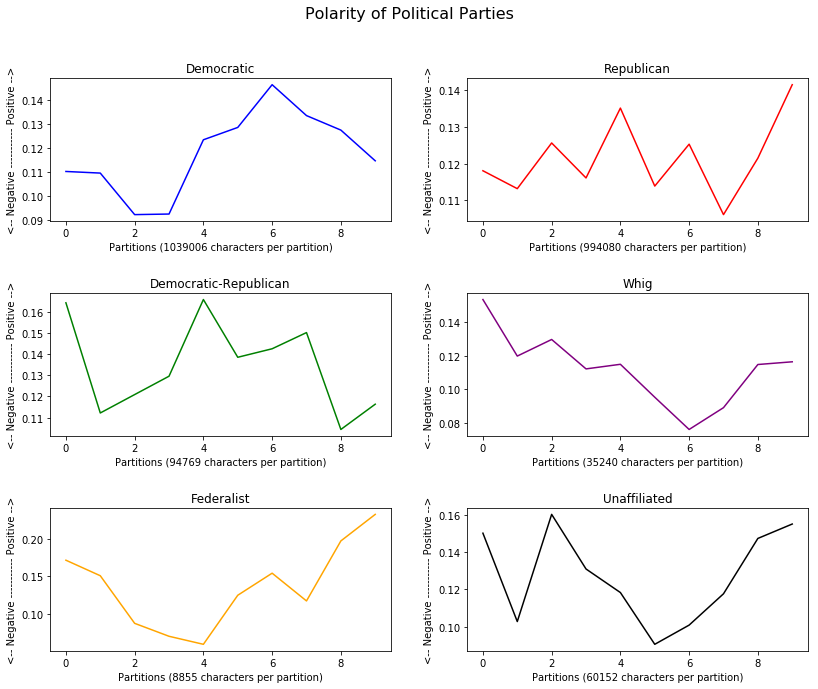

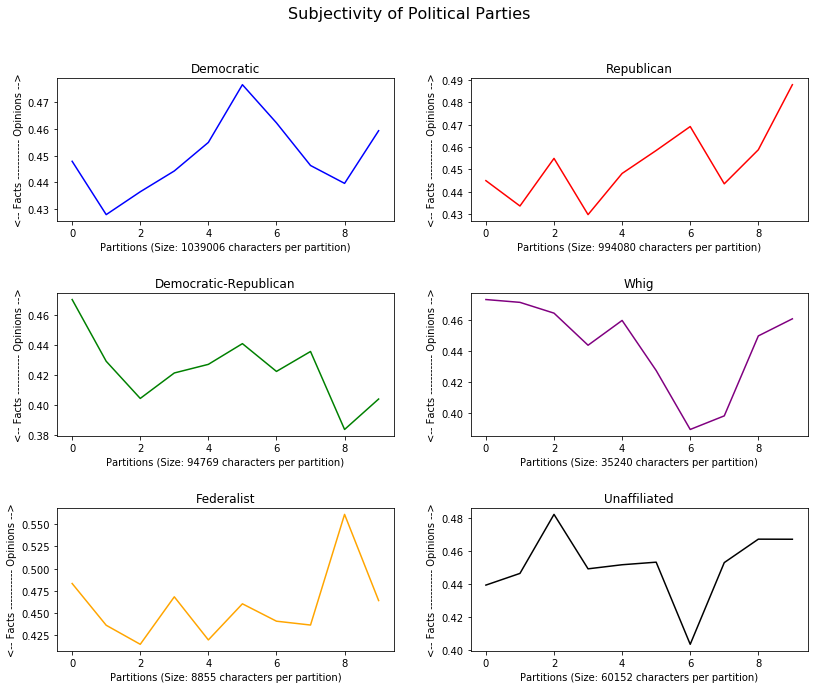

In [16]:
# Build party corpus
party_corpus = build_party_corpus(corpus)
party_corpus = party_corpus.reset_index()

# Plot polarity and subjectivity
graph_political_era_polarity(party_corpus, 'Polarity of Political Parties')
graph_political_era_subjectivity(party_corpus, 'Subjectivity of Political Parties')

## Polarity and Subjectivity of Political Parties Over Political Eras

In [17]:
# Find polarity and subjectivity of texts for each political era

# First party system
first_party_corpus['pol'] = first_party_corpus.transcripts.apply(pol)
first_party_corpus['subj'] = first_party_corpus.transcripts.apply(sub)

# Second party system
second_party_corpus['pol'] = second_party_corpus.transcripts.apply(pol)
second_party_corpus['subj'] = second_party_corpus.transcripts.apply(sub)

# Third party system
third_party_corpus['pol'] = third_party_corpus.transcripts.apply(pol)
third_party_corpus['subj'] = third_party_corpus.transcripts.apply(sub)

# Fourth party system
fourth_party_corpus['pol'] = fourth_party_corpus.transcripts.apply(pol)
fourth_party_corpus['subj'] = fourth_party_corpus.transcripts.apply(sub)

# Fifth party system
fifth_party_corpus['pol'] = fifth_party_corpus.transcripts.apply(pol)
fifth_party_corpus['subj'] = fifth_party_corpus.transcripts.apply(sub)

# Sixth party system
sixth_party_corpus['pol'] = sixth_party_corpus.transcripts.apply(pol)
sixth_party_corpus['subj'] = sixth_party_corpus.transcripts.apply(sub)

In [18]:
party_system_corpuses = [
                            first_party_corpus, 
                            second_party_corpus,
                            third_party_corpus,
                            fourth_party_corpus,
                            fifth_party_corpus,
                            sixth_party_corpus
                        ]

party_system_titles = [
                            'First Party System (1792–1824)',
                            'Second Party System (1828–1854)',
                            'Third Party System (1854–1895)',
                            'Fourth Party System (1896–1932)',
                            'Fifth Party System (1932–1964)',
                            'Sixth Party System (1964–present)'
                        ]

graph_political_era_tuples = list(zip(party_system_corpuses, party_system_titles))

### Plot Polarity

100%|██████████| 6/6 [00:18<00:00,  3.13s/it]


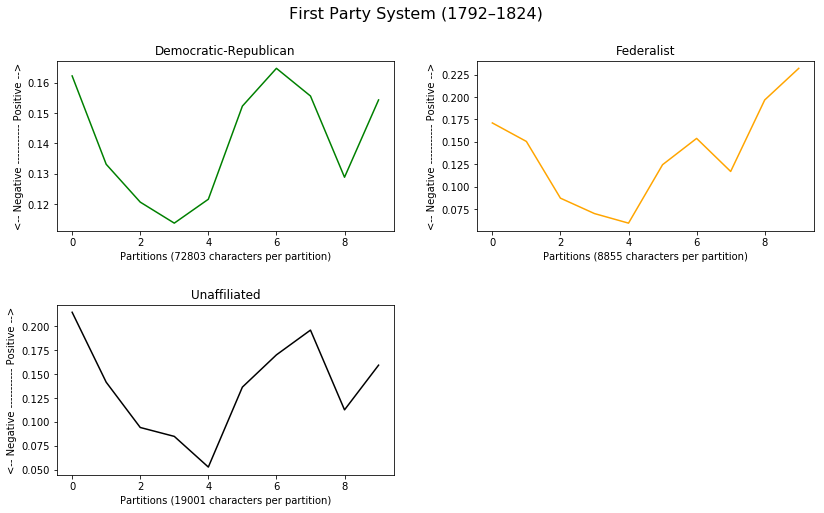

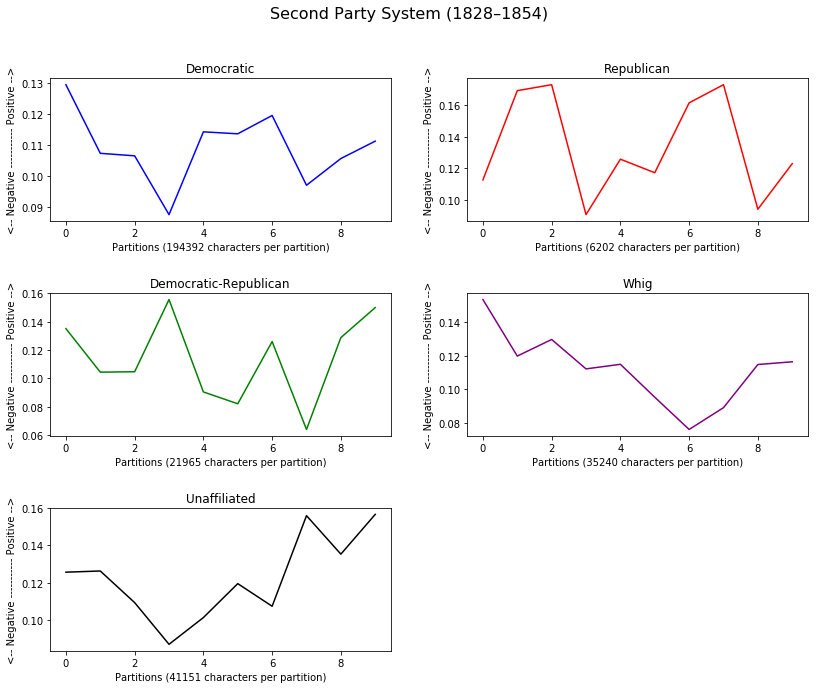

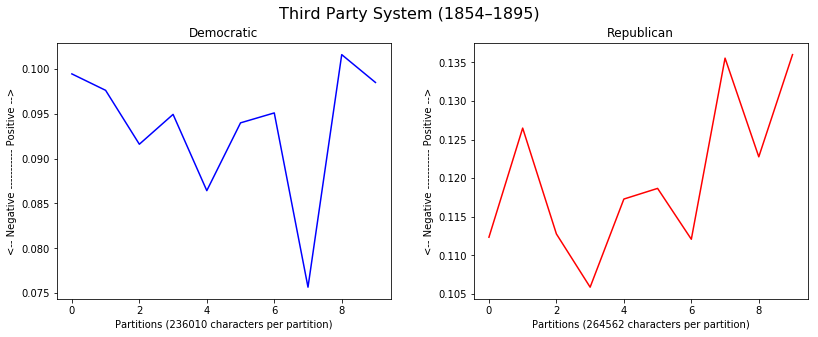

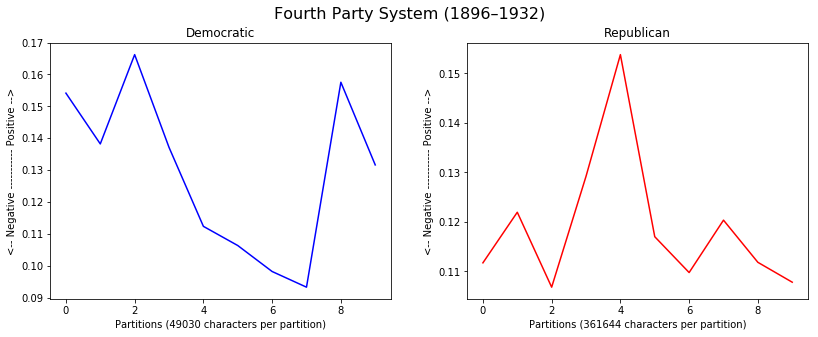

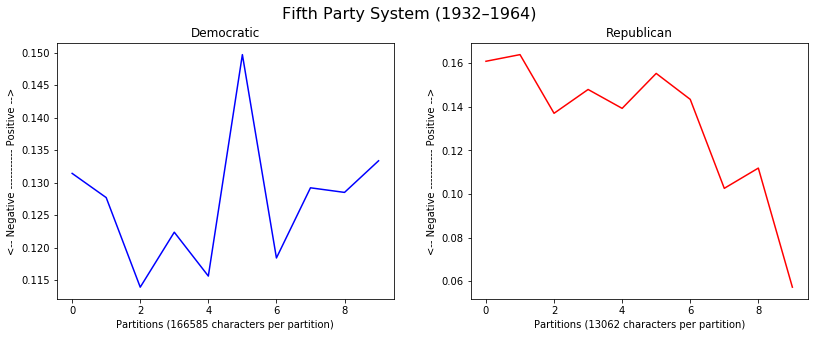

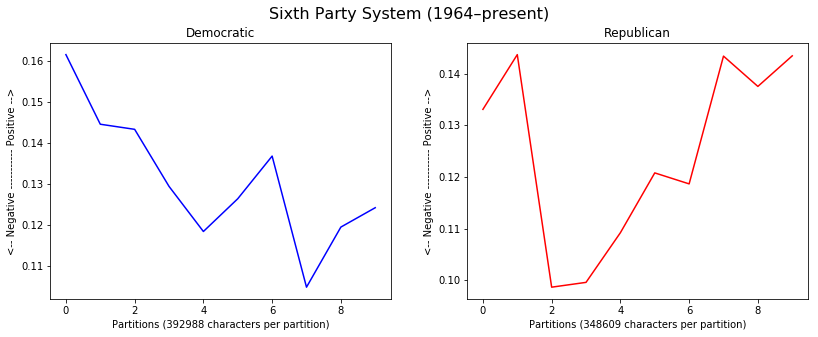

In [19]:
for corpus, title in tqdm(graph_political_era_tuples):
    graph_political_era_polarity(corpus, title)

### Plot Subjectivity

100%|██████████| 6/6 [00:19<00:00,  3.20s/it]


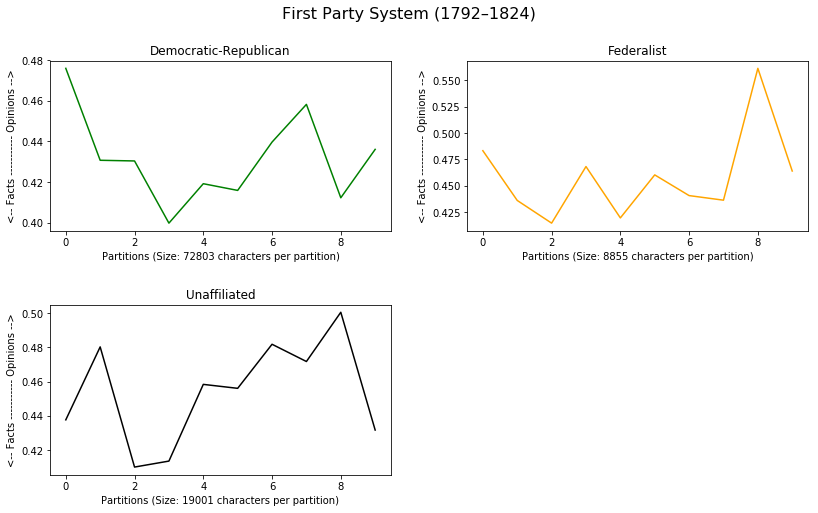

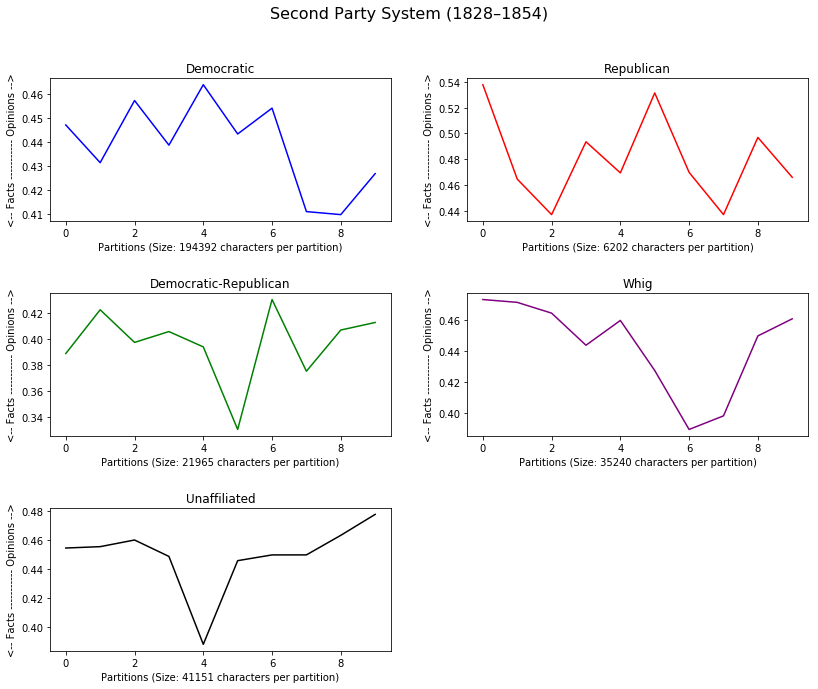

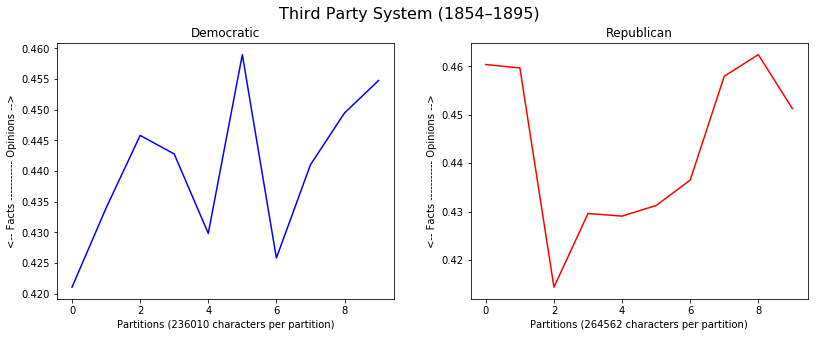

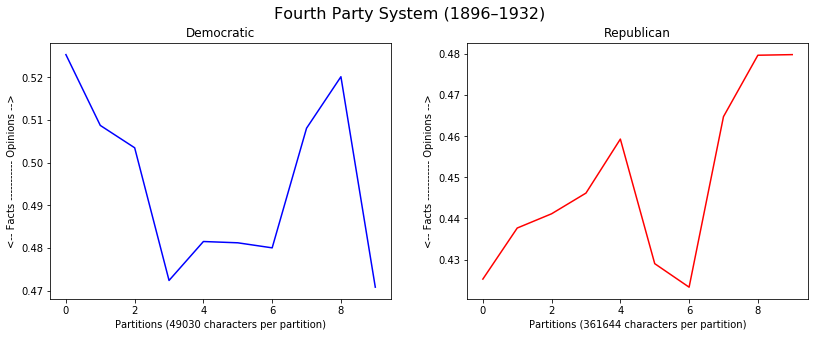

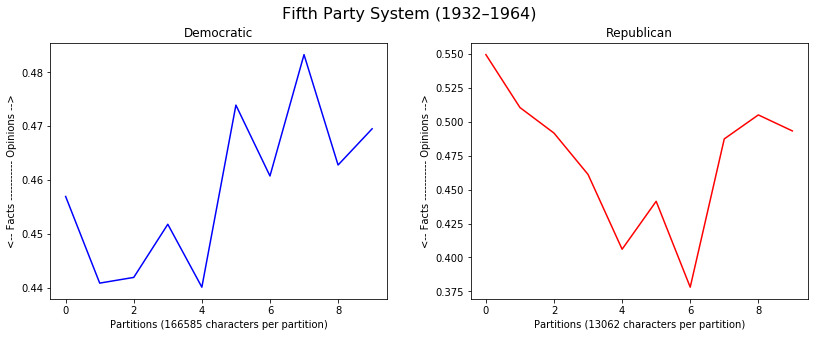

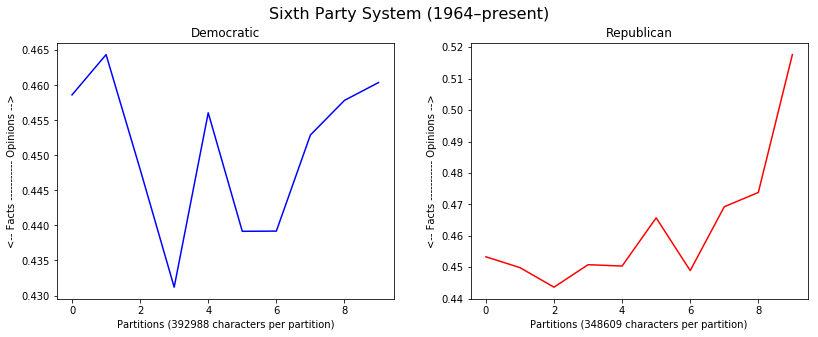

In [20]:
for corpus, title in tqdm(graph_political_era_tuples):
    graph_political_era_subjectivity(corpus, title)

### Plot Comparisons of Polarity and Subjectivty of Parties of Different Political Eras

100%|██████████| 6/6 [00:38<00:00,  6.43s/it]


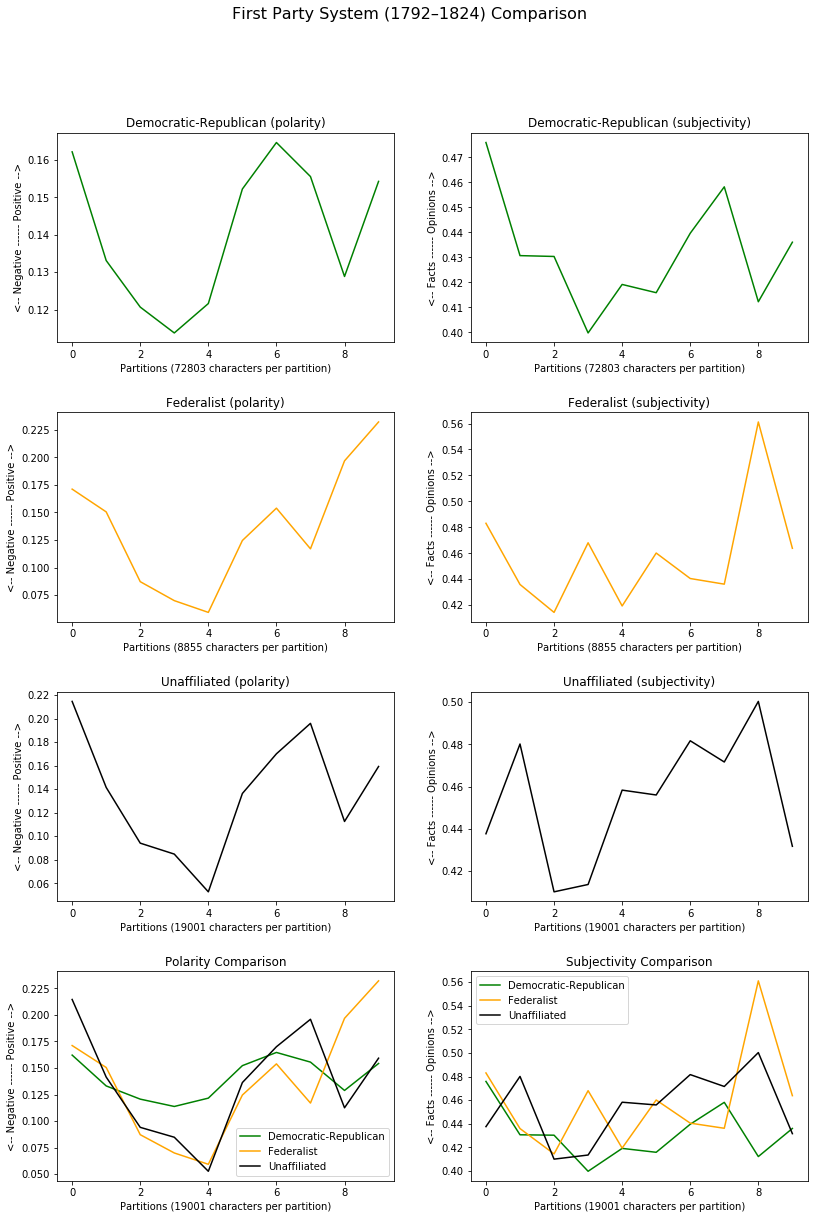

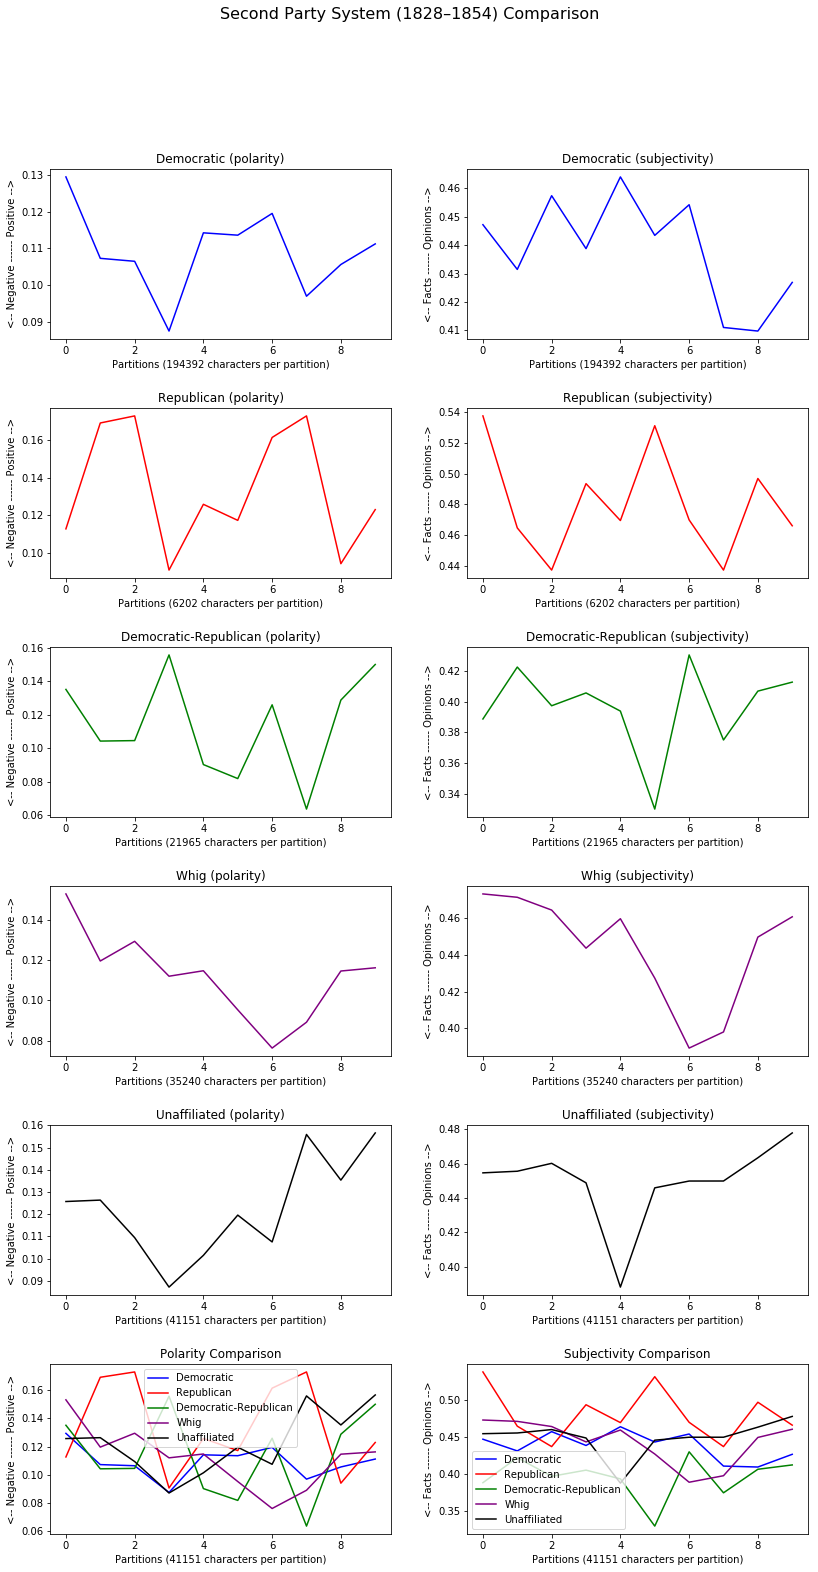

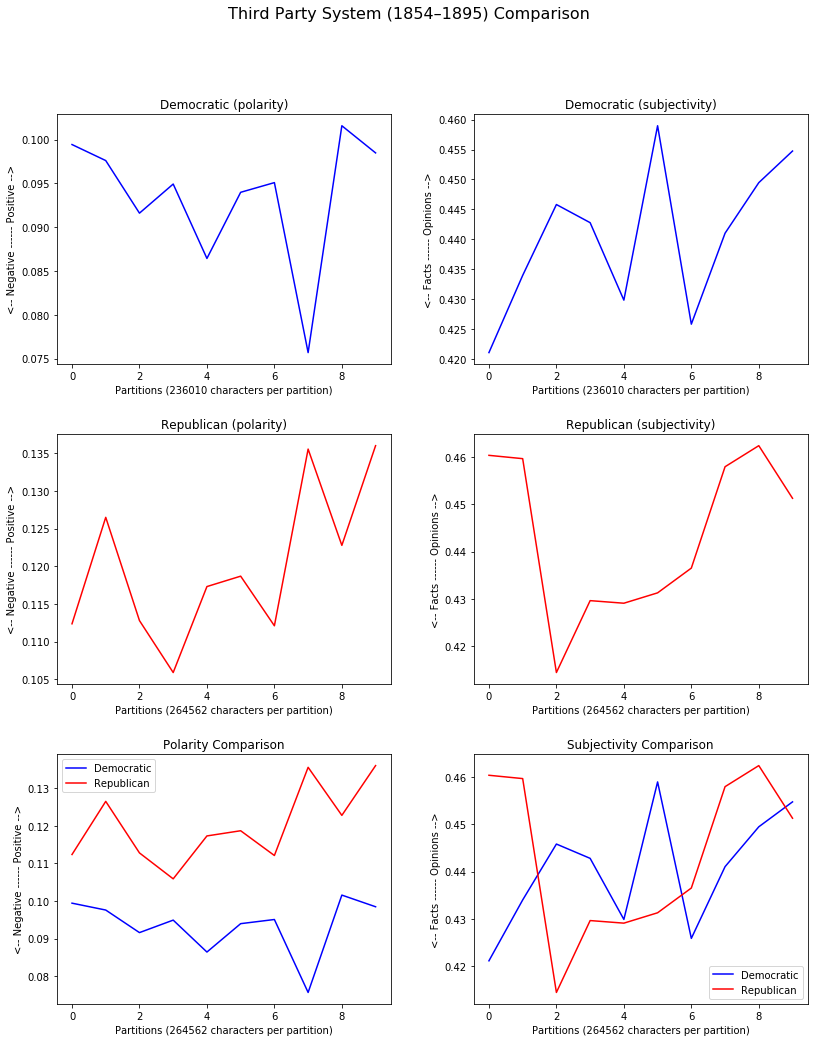

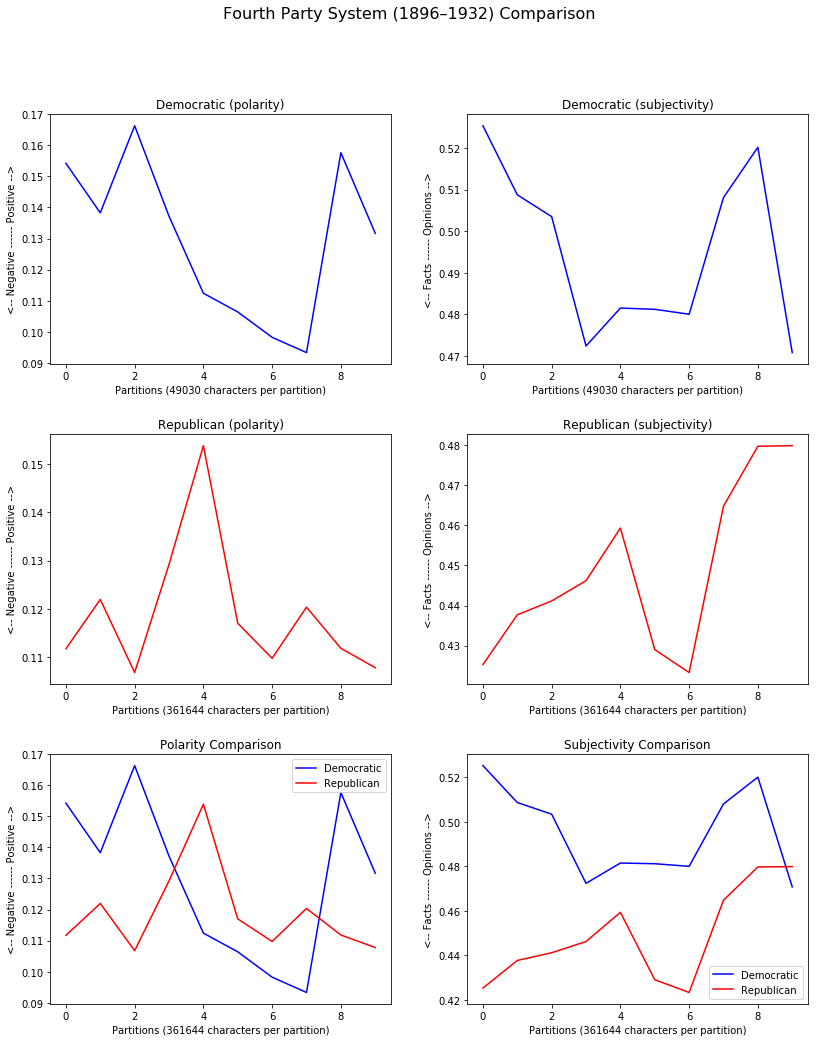

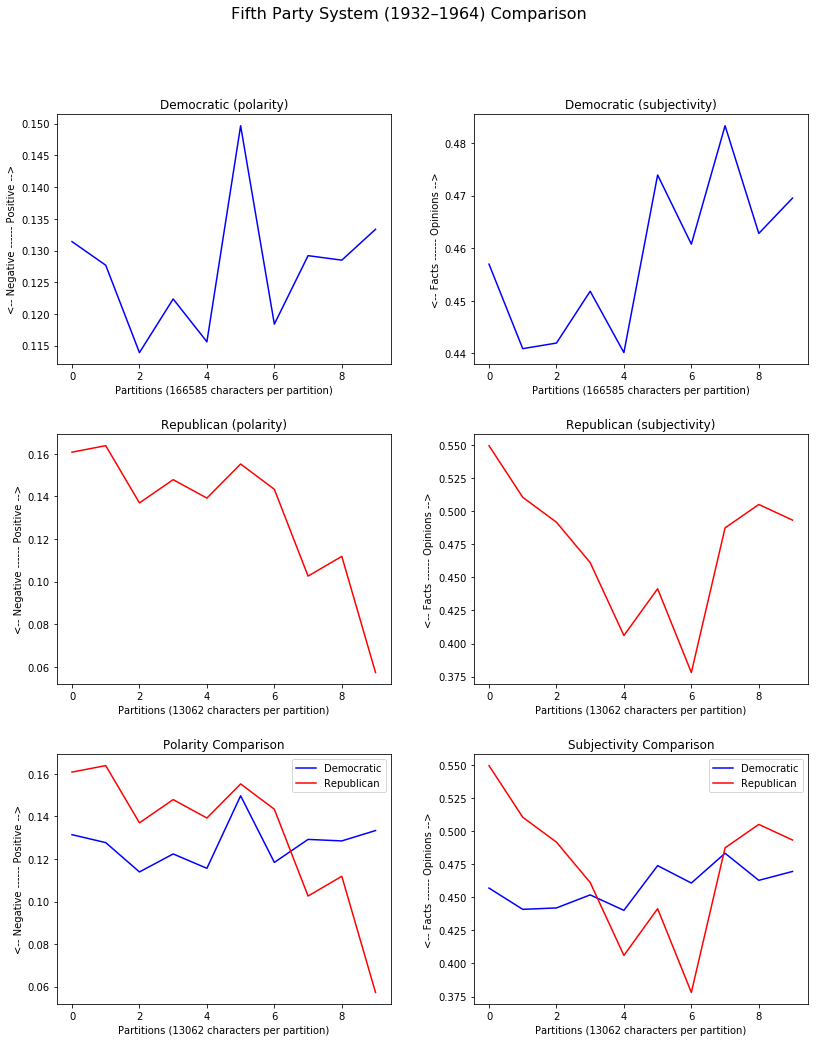

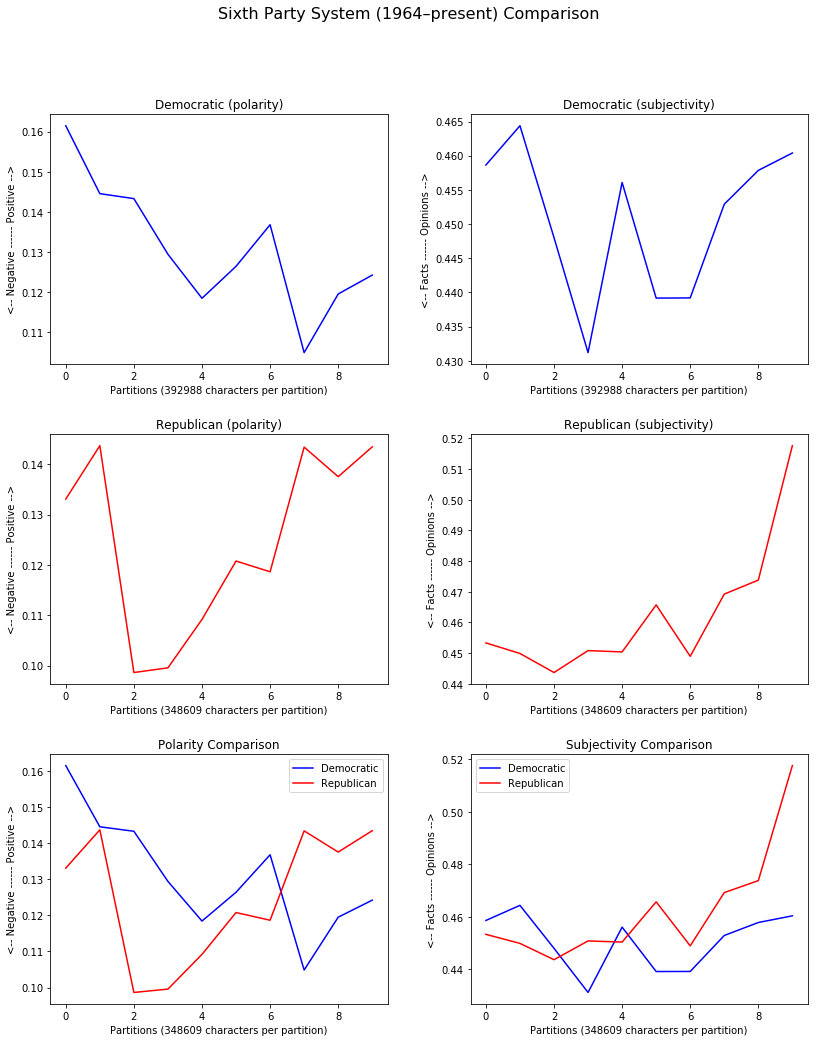

In [21]:
# Modify titles for comparisons
party_system_titles_comparison = [party + ' Comparison' for party in party_system_titles]
graph_political_era_comparison_tuples = list(zip(party_system_corpuses, party_system_titles_comparison))

for corpus, title in tqdm(graph_political_era_comparison_tuples):
    graph_political_era_comparison(corpus, title)